# Varying Threshold Plot

## Imports

In [40]:
import os
import pandas as pd
import matplotlib.pyplot as plt

## Set Variables

In [9]:
BASE_PATH = "external_repo"

In [10]:
csv_files = [
    "varying_thresholds_random.csv",
    "varying_thresholds_popular.csv",
    "varying_thresholds_GRU4REC_concat.csv",
    "varying_thresholds_encode.csv",
    "varying_thresholds_concat.csv",
    "varying_thresholds_auto.csv"
]

In [11]:
model_names = ["Random", "Popular", "GRU4REC Concat", "Cross-sessions Encode", "Cross-sessions Concat", "Cross-sessions Auto"]

## Plot Function

In [57]:
def plot_metric(column_name, csv_files, model_names, base_path, output_file=None):
    
    markers = ['o', 'v', '.', '', '', '']  
    styles = ['-','-','-','-',':','--']
    colors = ['#1f77b4', '#ff7f0e', '#9467bd', '#e377c2', '#7f7f7f', '#bcbd22'] 

    plt.figure(figsize=(8, 6))

    for i, file in enumerate(csv_files):
        file_path = os.path.join(base_path, file)
        if not os.path.exists(file_path):
            print(f"Warning: File not found - {file_path}")
            continue

        data = pd.read_csv(file_path)
        if column_name not in data.columns:
            print(f"Warning: Column '{column_name}' not found in {file}")
            continue

        k_values = list(range(1, len(data) + 1))  
        plt.plot(
            k_values,
            data[column_name],
            marker=markers[i % len(markers)],
            linestyle=styles[i % len(styles)],
            color=colors[i % len(colors)],
            label=model_names[i]
        )

    plt.xlabel("k")
    plt.ylabel(f"{column_name}@k")
    plt.legend(loc='lower right', fontsize=8)
    plt.grid(True)

    if output_file:
        plt.savefig(output_file)
    
    plt.show()

## HR@k

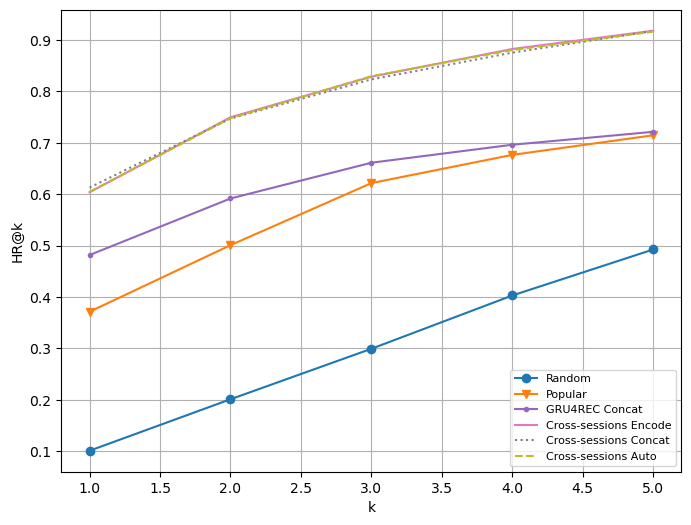

In [58]:
output_path = "documents/varying_thresholds_plots/hr_at_k.png"
plot_metric(
    column_name="HR",
    csv_files=csv_files,
    model_names=model_names,
    base_path=BASE_PATH,
    output_file=output_path
)

## MRR@k


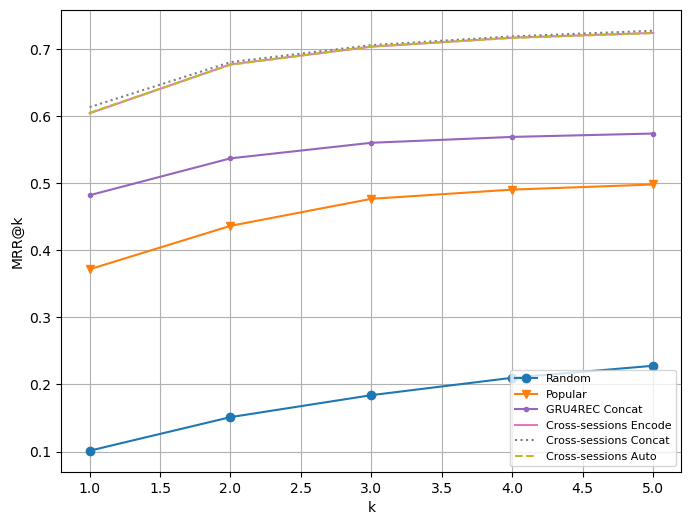

In [59]:
output_path = "documents/varying_thresholds_plots/mrr_at_k.png"
plot_metric(
    column_name="MRR",
    csv_files=csv_files,
    model_names=model_names,
    base_path=BASE_PATH,
    output_file=output_path
)